In [1]:
from tensorflow.keras import regularizers
import tensorflow as tf
import tensorflow_docs.plots

import pickle
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import cv2

In [2]:
infile = open('../data/dados_2020_02_08_15_17_13_285763_863_imagens','rb')
data = pickle.load(infile)
infile.close()

In [3]:
input_img = [cv2.cvtColor(t[0],cv2.COLOR_BGR2GRAY) for t in data]
label = np.array([t[1] for t in data])

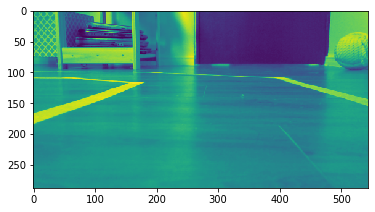

In [4]:
plt.imshow(input_img[2])

In [5]:
shape = input_img[0].shape
shape

(288, 544)

In [6]:
label = np.where(label=='RIGHT','FORWARD',label) #BUG NO APP_ROBOT.PY JÁ CORRIGIDO

In [7]:
# label_dict = {'LEFT':0, 'RIGHT':1, 'FORWARD':2, 'BACKWARD':3}
label_dict = {'LEFT':0, 'FORWARD':1}
label_encoded = np.array([label_dict[l] for l in label])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(input_img, label_encoded, test_size=0.1, random_state=42)

In [9]:
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0

In [10]:
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

In [11]:
y_test_hot = tf.one_hot(y_test,2)
y_train_hot = tf.one_hot(y_train,2)

In [12]:
REG = 0.01
DROP = 0.2
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(24,(5,5),activation='relu',kernel_regularizer=regularizers.l2(REG),input_shape=(288,544,1)),
#     tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(36,(5,5),activation='relu',kernel_regularizer=regularizers.l2(REG)),
#     tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(48,(5,5),activation='relu',kernel_regularizer=regularizers.l2(REG)),
#     tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_regularizer=regularizers.l2(REG)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_regularizer=regularizers.l2(REG)),
    
    tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(REG)),
#     tf.keras.layers.Dropout(DROP),
    tf.keras.layers.Dense(100,activation='relu',kernel_regularizer=regularizers.l2(REG)),
#     tf.keras.layers.Dropout(DROP),
    tf.keras.layers.Dense(50,activation='relu',kernel_regularizer=regularizers.l2(REG)),
#     tf.keras.layers.Dropout(DROP),
    tf.keras.layers.Dense(10,activation='relu',kernel_regularizer=regularizers.l2(REG)),
    tf.keras.layers.Dense(2, activation='softmax',kernel_regularizer=regularizers.l2(REG))
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train, validation_split=0.15, epochs=100)

Train on 659 samples, validate on 117 samples
Epoch 1/100
 32/659 [>.............................] - ETA: 13:56

ResourceExhaustedError:  OOM when allocating tensor with shape[9191424,100] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu
	 [[node Tile_6 (defined at /home/lacouth/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1751) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_distributed_function_1951]

Function call stack:
distributed_function


In [ ]:
model.evaluate(X_test, y_test,verbose=2)

In [ ]:
model.save('../models/model_esquerda_10VOLTAS.h5')

In [ ]:
type(X_test)

In [ ]:
img = input_img[88][tf.newaxis,...,tf.newaxis] / 255.0

In [ ]:
np.argmax(model.predict(img))

In [ ]:
label[88]